In [88]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
# import matplotlib.style as style  
# style.use('default') 
# style.use('tableau-colorblind10') 
# style.use('seaborn-colorblind') 
from cycler import cycler
import matplotlib as mpl
mpl.rcParams['axes.prop_cycle'] = cycler(color=["#bcbcbc", "#3388b6", "#ff993e"])

In [89]:
os.chdir(r"G:\Araki\SMSigxModel\analysis\9_plot_code")
in_path = r"..\8_out\Mahurangi"
out_path = r"..\10_plot"

senario_names = ['KGE on Flow', 'KGE on Soil Moisture', 'KGE on seasonal transition', 'KGE on Flow + KGE on Soil Moisture', 'KGE on Flow + Seasonal Timing on Soil Moisture']

In [90]:
for i in range(1, 6):
    results_tot_metrics0 = pd.read_csv(os.path.join(in_path, f'ws2_ex{i}', 'post_evaluations.csv'), index_col=0)
    tot_metrics_names = results_tot_metrics0.columns
    results_tot_metrics0['senario_id'] = i
    if i==1:
        results_tot_metrics = results_tot_metrics0
    else:
        results_tot_metrics = pd.concat([results_tot_metrics, results_tot_metrics0])

results_tot_metrics

,KGE on Soil Moisture Content,KGE on Flow,season_transition on Soil Moisture Content (d2w_start),season_transition on Soil Moisture Content (d2w_end),season_transition on Soil Moisture Content (w2d_start),season_transition on Soil Moisture Content (w2d_end),senario_id
0,0.402927,0.623799,12.809037,30.304073,24.783301,23.447297,1
1,0.222009,0.772699,15.145144,18.605784,28.839850,29.130336,1
2,-0.330991,0.687770,17.000585,23.991486,26.641155,29.701668,1
3,0.443602,0.627383,9.770294,35.099762,19.616079,13.685517,1
4,0.438195,0.770600,12.594477,8.225853,29.287008,28.845208,1
...,...,...,...,...,...,...,...
9984,0.534606,0.808628,13.247091,29.842002,24.601748,23.393017,5
9985,0.659700,0.525507,6.144742,28.169781,29.544209,1.413094,5
9988,0.438128,0.730556,11.712312,6.365652,27.918386,26.826627,5
9993,0.090171,0.540584,11.481023,15.538421,21.614976,24.988065,5


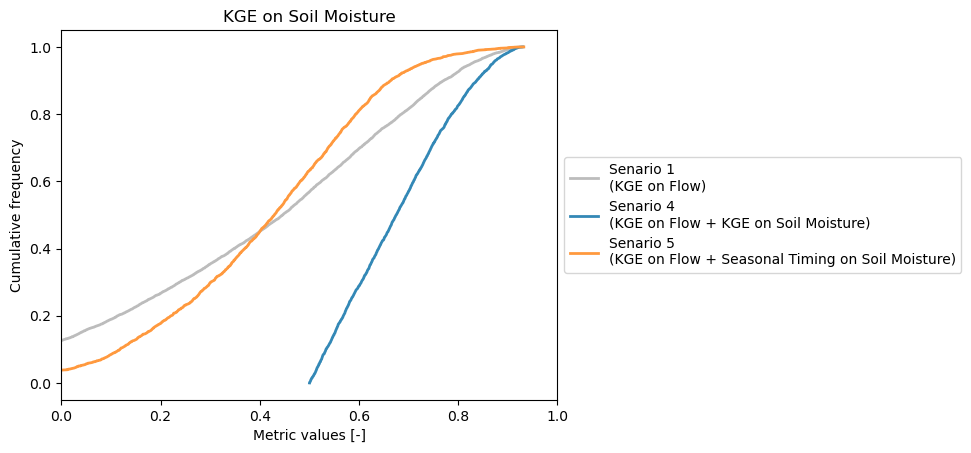

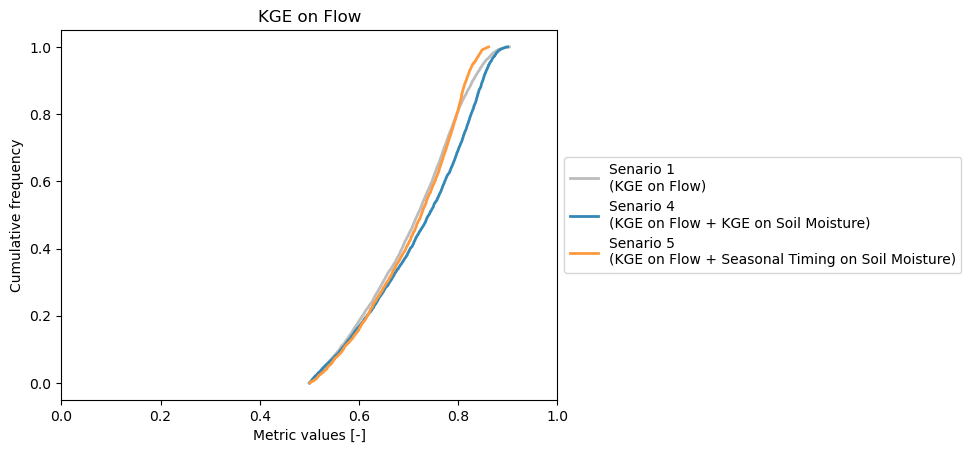

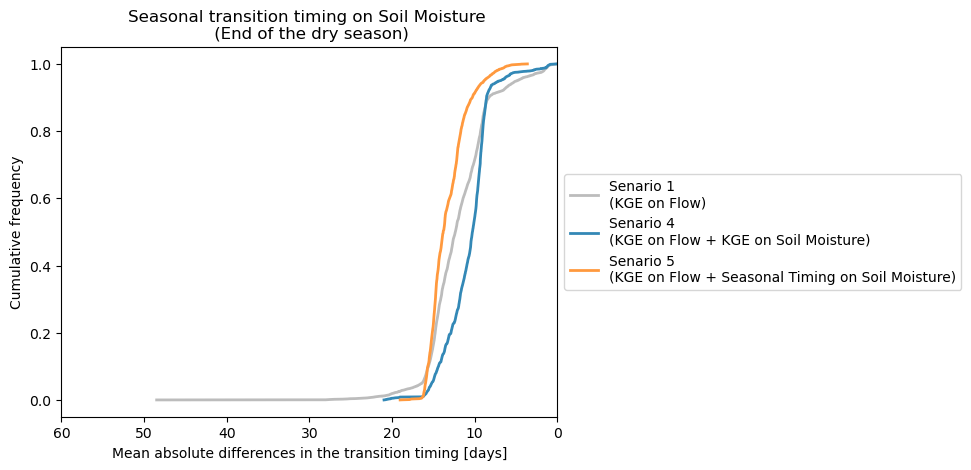

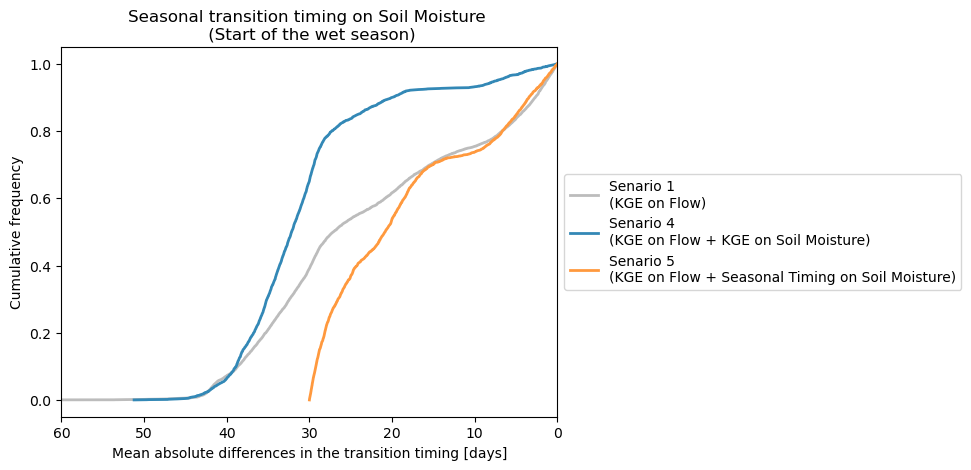

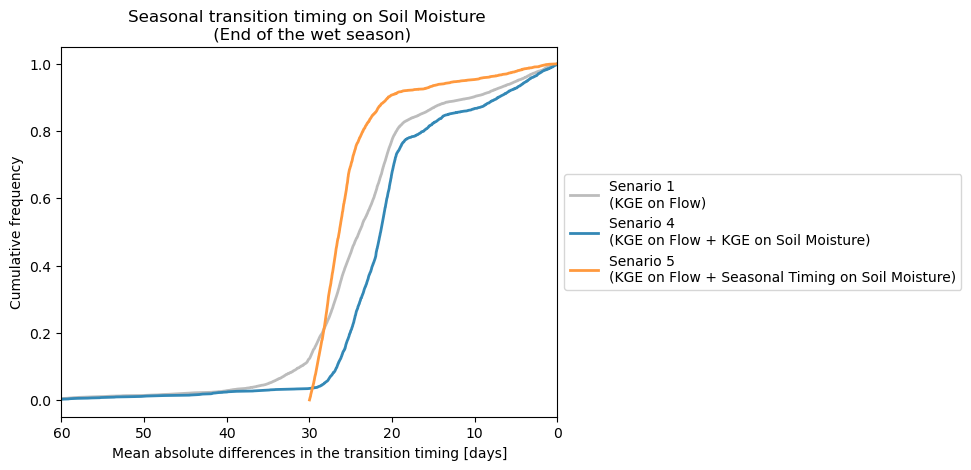

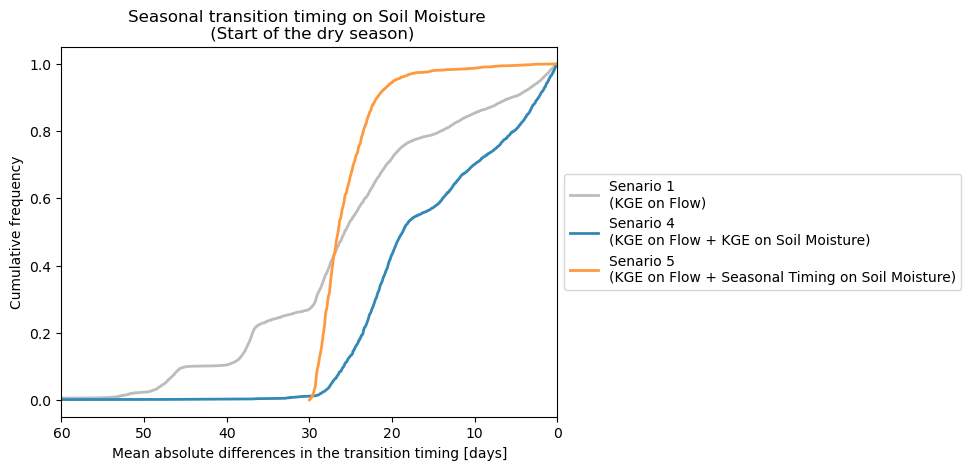

In [91]:
fig_title = ['KGE on Soil Moisture', 'KGE on Flow', 'Seasonal transition timing on Soil Moisture \n (End of the dry season)', 'Seasonal transition timing on Soil Moisture \n (Start of the wet season)', 
            'Seasonal transition timing on Soil Moisture \n (End of the wet season)', 'Seasonal transition timing on Soil Moisture \n (Start of the dry season)']
# colors = ['#BCBCBC', '#3388B6', '#3388B6', '#3388B6', '#FF993E']

for j in range(len(tot_metrics_names)):
    fig, ax = plt.subplots()
    for i in [1,4,5]:
        data = results_tot_metrics[[tot_metrics_names[j], 'senario_id']][results_tot_metrics['senario_id']==i].copy()
        data_np = data[tot_metrics_names[j]].values

        # CDF 
        # https://www.statology.org/cdf-python/

        #sort data
        x = np.sort(data_np)
        
        if 'season' in tot_metrics_names[j]:
            x = x[::-1]
        
        #calculate CDF values
        y = 1. * np.arange(len(data_np)) / (len(data_np) - 1)
        
        #plot CDF
        plt.plot(x, y, label=f"Senario {i}\n({senario_names[i-1]})", linewidth=2)
        
    if 'season' in tot_metrics_names[j]:
        ax.set_xlim([0, 60])
        ax.set_xlabel('Mean absolute differences in the transition timing [days]')
        ax.invert_xaxis()
    else:
        ax.set_xlabel('Metric values [-]')
        ax.set_xlim([0, 1])
    ax.set_title(fig_title[j])
    ax.set_ylabel('Cumulative frequency')
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    fig.savefig(os.path.join(out_path, f'CDF_{tot_metrics_names[j]}.png'))

In [92]:
for i in range(1, 6):
    results_monthly_metrics0 = pd.read_csv(os.path.join(in_path, f'ws2_ex{i}', 'post_evaluations_monthly_metrics.csv'), index_col=0)
    monthly_metrics_names = results_monthly_metrics0.columns
    results_monthly_metrics0.index = pd.to_datetime(results_monthly_metrics0.index, format="%Y-%m-%d")
    results_monthly_metrics0['senario_id'] = i
    results_monthly_metrics0['Month'] = results_monthly_metrics0.index.month
    if i==1:
        results_monthly_metrics = results_monthly_metrics0
    else:
        results_monthly_metrics = pd.concat([results_monthly_metrics, results_monthly_metrics0])

results_monthly_metrics


,Q_mean_obs,Q_mean_sim,run_id,Q_mean_bias,high_flow_freq_obs,high_flow_freq_sim,high_flow_freq_bias,RR_obs,RR_sim,RR_bias,senario_id,Month
Time,,,,,,,,,,,,
1998-03-31,0.000028,5.422127e-06,0,-0.000023,0.013441,0.005376,-0.008065,0.162265,0.031122,-0.131142,1,3
1998-04-30,0.000015,8.606247e-07,0,-0.000015,0.000000,0.000000,0.000000,0.161294,0.008957,-0.152337,1,4
1998-05-31,0.000041,1.581225e-06,0,-0.000040,0.009409,0.000000,-0.009409,0.310268,0.011835,-0.298433,1,5
1998-06-30,0.000129,1.609045e-04,0,0.000032,0.054167,0.112500,0.058333,0.545168,0.681553,0.136384,1,6
1998-07-31,0.000604,7.306226e-04,0,0.000127,0.342742,0.563172,0.220430,0.770003,0.931980,0.161977,1,7
...,...,...,...,...,...,...,...,...,...,...,...,...
2001-04-30,0.000098,2.744781e-05,9998,-0.000070,0.059722,0.027778,-0.031944,0.351672,0.098987,-0.252685,5,4
2001-05-31,0.000289,3.652636e-04,9998,0.000076,0.196237,0.436828,0.240591,0.582068,0.735274,0.153205,5,5
2001-06-30,0.000094,7.977410e-05,9998,-0.000014,0.012500,0.050000,0.037500,0.905890,0.772082,-0.133808,5,6


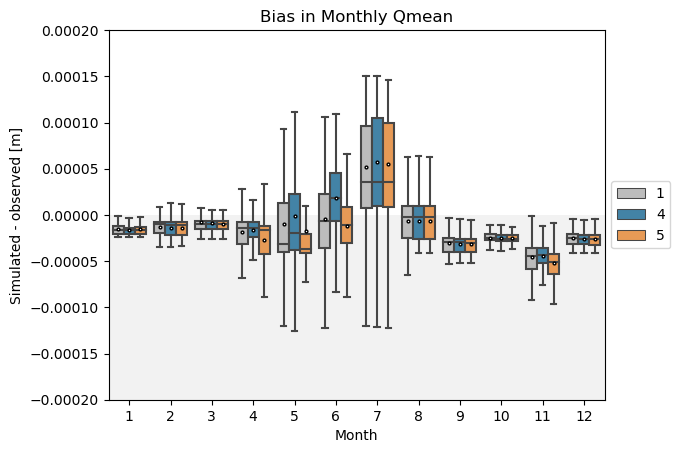

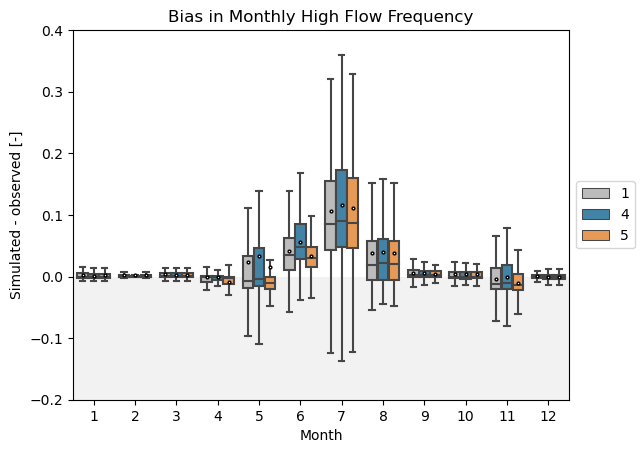

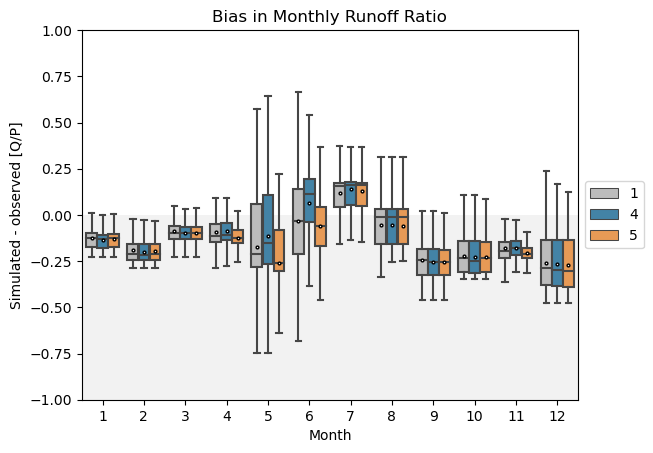

In [93]:
# Box plots
target_monthly_metrics = ['Q_mean_bias', 'high_flow_freq_bias', 'RR_bias']
fig_title = ['Bias in Monthly Qmean', 'Bias in Monthly High Flow Frequency', 'Bias in Monthly Runoff Ratio']
ylabel = ['Simulated - observed [m]', 'Simulated - observed [-]', 'Simulated - observed [Q/P]']
ymin = [-0.0002, -0.2, -1]
ymax = [0.0002, 0.4, 1]
# results_monthly_metrics['senario_id']==1 | results_monthly_metrics['senario_id']==3 | results_monthly_metrics['senario_id']==5
subset_results_monthly_metrics = results_monthly_metrics[(results_monthly_metrics['senario_id']==1) | (results_monthly_metrics['senario_id']==4) | (results_monthly_metrics['senario_id']==5)]

for j in range(len(target_monthly_metrics)):
    plt.figure()
    plt.axhspan(ymin=-10, ymax=0, facecolor='gray', alpha=0.1, zorder=-1)
    boxplot = sns.boxplot(x='Month', y=target_monthly_metrics[j], data=subset_results_monthly_metrics, hue='senario_id', showfliers = False,zorder=10, showmeans=True, meanprops={"marker":"o",
                       "markerfacecolor":"white", 
                       "markeredgecolor":"black",
                      "markersize":"2"})
    boxplot.set_ylim([ymin[j], ymax[j]])
    boxplot.set_ylabel(ylabel[j])
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    plt.title(fig_title[j])
    fig.savefig(os.path.join(out_path, f'MonthlyBoxPlot_{target_monthly_metrics[j]}.png'))


In [94]:
in_path2 = r"..\6_out\Mahurangi"
for i in [1,4,5]:
    results_quantile_Q_0 = pd.read_csv(os.path.join(in_path2, f'ws2_ex{i}', 'quantiles_Q.csv'), index_col=0)
    tot_metrics_names = results_tot_metrics0.columns
    results_quantile_Q_0['senario_id'] = i
    if i==1:
        results_quantile_Q = results_quantile_Q_0
    else:
        results_quantile_Q = pd.concat([results_quantile_Q, results_quantile_Q_0])

results_quantile_Q

,lowerlim,median,upperlim,senario_id
Time,,,,
1998-02-20 11:00:00,2.203119e-09,5.618651e-09,1.940320e-08,1
1998-02-20 12:00:00,4.478152e-09,1.141123e-08,3.926216e-08,1
1998-02-20 13:00:00,8.954330e-09,2.281568e-08,7.810648e-08,1
1998-02-20 14:00:00,4.693890e-09,1.195891e-08,4.115734e-08,1
1998-02-20 15:00:00,2.346945e-09,5.983066e-09,2.063831e-08,1
...,...,...,...,...
2001-09-06 12:00:00,7.322804e-05,4.509087e-04,8.151644e-04,5
2001-09-06 13:00:00,6.452679e-05,4.396139e-04,7.979876e-04,5
2001-09-06 14:00:00,5.784128e-05,4.276386e-04,7.822042e-04,5


In [95]:
in_path2 = r"..\6_out\Mahurangi"
for i in [1,4,5]:
    results_quantile_SM_0 = pd.read_csv(os.path.join(in_path2, f'ws2_ex{i}', 'quantiles_SM.csv'), index_col=0)
    tot_metrics_names = results_quantile_SM_0.columns
    results_quantile_SM_0['senario_id'] = i
    if i==1:
        results_quantile_SM = results_quantile_SM_0
    else:
        results_quantile_SM = pd.concat([results_quantile_SM, results_quantile_SM_0])

results_quantile_SM

,lowerlim,median,upperlim,senario_id
Time,,,,
1998-02-20 11:00:00,0.253935,0.407756,0.604588,1
1998-02-20 12:00:00,0.253945,0.407767,0.604600,1
1998-02-20 13:00:00,0.253945,0.407767,0.604600,1
1998-02-20 14:00:00,0.253945,0.407767,0.604600,1
1998-02-20 15:00:00,0.253945,0.407767,0.604600,1
...,...,...,...,...
2001-09-06 12:00:00,0.423212,0.585428,0.762384,5
2001-09-06 13:00:00,0.423173,0.585299,0.762370,5
2001-09-06 14:00:00,0.423159,0.585216,0.762357,5


In [113]:
obs = pd.read_csv(r'../2_data_input/Mahurangi/full/test_sm_basinavg.csv')
obs["Time"] = pd.to_datetime(obs["Time"], format="%m/%d/%Y %H:%M")
obs.set_axis(obs["Time"], axis=0, inplace=True)
obs

,Time,Time Step,Rainfall,Flow,Soil Moisture Content,Direct Runoff,GIUH Runoff,Lateral Flow,Base Flow,Total Discharge
Time,,,,,,,,,,
1998-02-20 11:00:00,1998-02-20 11:00:00,0,6.340000e-05,0.000010,0.348172,0,0,0,0,0.130001
1998-02-20 12:00:00,1998-02-20 12:00:00,1,1.140000e-05,0.000010,0.348084,0,0,0,0,0.124001
1998-02-20 13:00:00,1998-02-20 13:00:00,2,8.540000e-14,0.000009,0.348011,0,0,0,0,0.118001
1998-02-20 14:00:00,1998-02-20 14:00:00,3,0.000000e+00,0.000009,0.354702,0,0,0,0,0.113000
1998-02-20 15:00:00,1998-02-20 15:00:00,4,0.000000e+00,0.000008,0.354622,0,0,0,0,0.109000
...,...,...,...,...,...,...,...,...,...,...
2001-09-06 12:00:00,2001-09-06 12:00:00,31057,0.000000e+00,0.000188,0.456582,0,0,0,0,2.439010
2001-09-06 13:00:00,2001-09-06 13:00:00,31058,0.000000e+00,0.000184,0.456375,0,0,0,0,2.390010
2001-09-06 14:00:00,2001-09-06 14:00:00,31059,0.000000e+00,0.000181,0.456181,0,0,0,0,2.340010


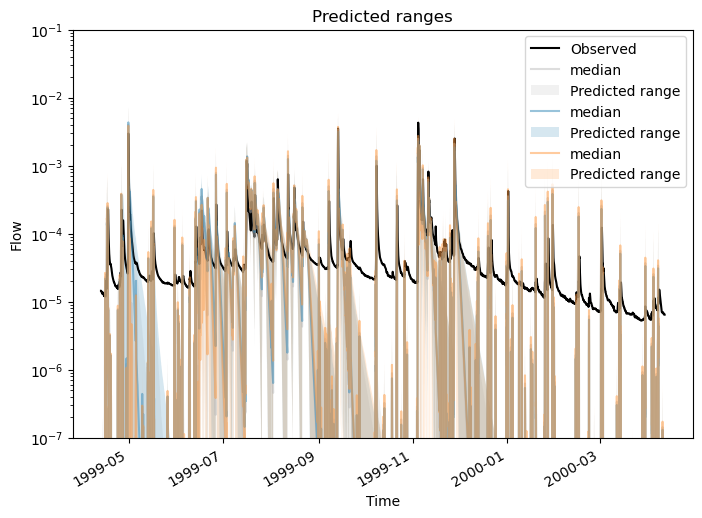

In [117]:

quantiles = [10, 50, 90]
color = ["#bcbcbc", "#3388b6", "#ff993e"]

results_quantile_Q.index = pd.to_datetime(results_quantile_Q.index)
results_quantile_SM.index = pd.to_datetime(results_quantile_SM.index)

###### FLOW #####
f2 = plt.figure(figsize=(8, 6))
ax2 = f2.add_subplot()
c=-1
ax2.plot(obs["Time"].iloc[10000:10000+24*365], obs["Flow"].iloc[10000:10000+24*365], color='k', label='Observed')
for i in [1,4,5]:
    c+=1
    df_simrange = results_quantile_Q[results_quantile_Q['senario_id']==i].copy()
    df_simrange_subset = df_simrange.iloc[10000:10000+24*365]
    df_simrange_subset['median'].plot(color=color[c], alpha=0.5, ax=ax2)
    plt.fill_between(df_simrange_subset.index, df_simrange_subset['upperlim'], df_simrange_subset['lowerlim'],
                 facecolor=color[c], alpha=0.2, interpolate=True, label='Predicted range')
    ax2.set_yscale('log')
    ax2.set_ylim([1E-7, 1E-01])
    ax2.set_xlabel('Time')
    ax2.set_ylabel('Flow')
    ax2.set_title('Predicted ranges')
    ax2.legend()
f2.autofmt_xdate()
f2.savefig(os.path.join(out_path, 'timeseries_Q.png'), dpi=600)

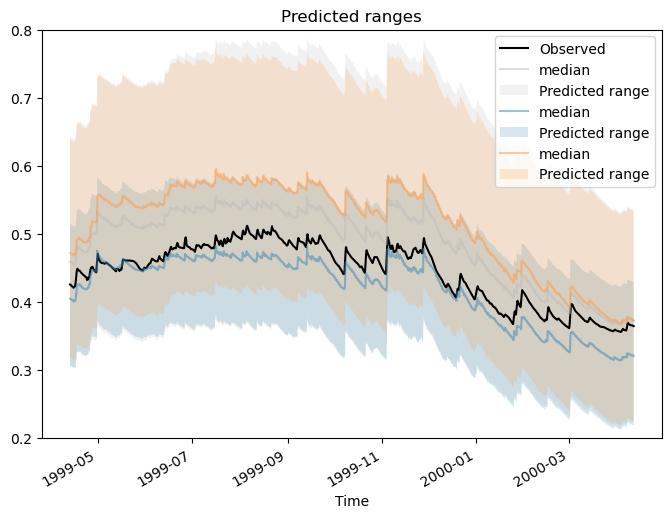

In [118]:
###### SM #####
f4 = plt.figure(figsize=(8, 6))
ax4 = f4.add_subplot()
c=-1
ax4.plot(obs["Time"].iloc[10000:10000+24*365], obs["Soil Moisture Content"].iloc[10000:10000+24*365], color='k', label='Observed')
for i in [1,4,5]:
    c+=1
    df_simrange = results_quantile_SM[results_quantile_SM['senario_id']==i].copy()
    df_simrange_subset = df_simrange.iloc[10000:10000+24*365]
    df_simrange_subset['median'].plot(color=color[c], alpha=0.5, ax=ax4)
    plt.fill_between(df_simrange_subset.index, df_simrange_subset['upperlim'], df_simrange_subset['lowerlim'],
                 facecolor=color[c], alpha=0.2, interpolate=True, label='Predicted range')
    ax4.set_ylim([0.2, 0.8])
    ax4.set_xlabel('Time')
    ax4.set_ylabel('')
    ax4.set_title('Predicted ranges')
    ax4.legend()
f4.autofmt_xdate()
f4.savefig(os.path.join(out_path, 'timeseries_SM.png'), dpi=600)


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


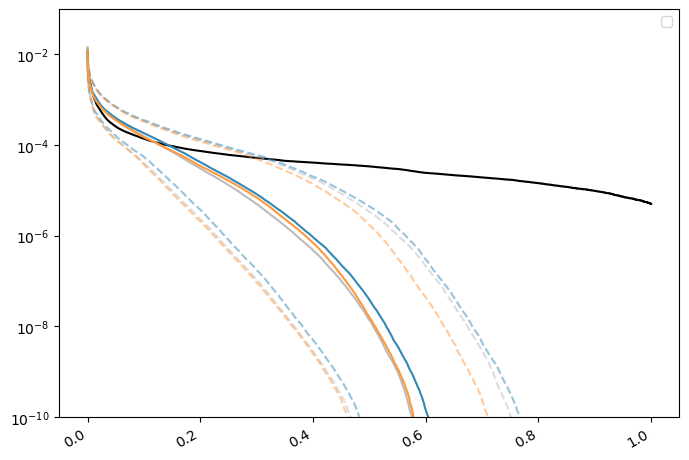

In [119]:
###### FLOW #####
f = plt.figure(figsize=(8, 6))
ax = f.add_subplot()
quantiles = [10, 50, 90]
color = ["#bcbcbc", "#3388b6", "#ff993e"]
c=-1
results_quantile_Q.index = pd.to_datetime(results_quantile_Q.index)

obs_fdc_x = np.sort(obs['Flow'].values)
obs_fdc_x = obs_fdc_x[::-1]
obs_fdc_y = 1. * np.arange(len(obs_fdc_x)) / (len(obs_fdc_x) - 1)
ax.plot(obs_fdc_y, obs_fdc_x, color='k')

for i in [1,4,5]:
    c+=1
    df_simrange = results_quantile_Q[results_quantile_Q['senario_id']==i].copy()
    
    #sort data
    median_fdc_x = np.sort(df_simrange['median'].values)
    median_fdc_x = median_fdc_x[::-1]
    median_fdc_y = 1. * np.arange(len(median_fdc_x)) / (len(median_fdc_x) - 1)
    upperlim_fdc_x = np.sort(df_simrange['upperlim'].values)
    upperlim_fdc_x = upperlim_fdc_x[::-1]
    upperlim_fdc_y = 1. * np.arange(len(upperlim_fdc_x)) / (len(upperlim_fdc_x) - 1)
    lowerlim_fdc_x = np.sort(df_simrange['lowerlim'].values)
    lowerlim_fdc_x = lowerlim_fdc_x[::-1]
    lowerlim_fdc_y = 1. * np.arange(len(lowerlim_fdc_x)) / (len(lowerlim_fdc_x) - 1)

    ax.plot(median_fdc_y, median_fdc_x, color=color[c])
    ax.plot(upperlim_fdc_y, upperlim_fdc_x, color=color[c], alpha=0.5, linestyle='--')
    ax.plot(lowerlim_fdc_y, lowerlim_fdc_x, color=color[c], alpha=0.5, linestyle='--')
    ax.set_yscale('log')
    ax.set_ylim([1E-10, 1E-01])

    ax.legend()
f.autofmt_xdate()
f.savefig(os.path.join(out_path, 'FDC_Q.png'), dpi=600)


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


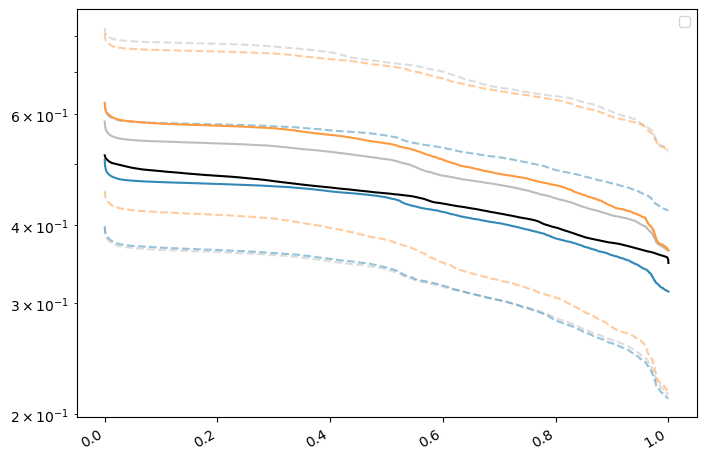

In [121]:
###### SM #####
f3 = plt.figure(figsize=(8, 6))
ax3 = f3.add_subplot()
quantiles = [10, 50, 90]
color = ["#bcbcbc", "#3388b6", "#ff993e"]
c=-1

obs_fdc_x = np.sort(obs['Soil Moisture Content'].values)
obs_fdc_x = obs_fdc_x[::-1]
obs_fdc_y = 1. * np.arange(len(obs_fdc_x)) / (len(obs_fdc_x) - 1)
ax3.plot(obs_fdc_y, obs_fdc_x, color='k')

for i in [1,4,5]:
    c+=1
    df_simrange = results_quantile_SM[results_quantile_SM['senario_id']==i].copy()
    
    #sort data
    median_fdc_x = np.sort(df_simrange['median'].values)
    median_fdc_x = median_fdc_x[::-1]
    median_fdc_y = 1. * np.arange(len(median_fdc_x)) / (len(median_fdc_x) - 1)
    upperlim_fdc_x = np.sort(df_simrange['upperlim'].values)
    upperlim_fdc_x = upperlim_fdc_x[::-1]
    upperlim_fdc_y = 1. * np.arange(len(upperlim_fdc_x)) / (len(upperlim_fdc_x) - 1)
    lowerlim_fdc_x = np.sort(df_simrange['lowerlim'].values)
    lowerlim_fdc_x = lowerlim_fdc_x[::-1]
    lowerlim_fdc_y = 1. * np.arange(len(lowerlim_fdc_x)) / (len(lowerlim_fdc_x) - 1)

    ax3.plot(median_fdc_y, median_fdc_x, color=color[c])
    ax3.plot(upperlim_fdc_y, upperlim_fdc_x, color=color[c], alpha=0.5, linestyle='--')
    ax3.plot(lowerlim_fdc_y, lowerlim_fdc_x, color=color[c], alpha=0.5, linestyle='--')
    # plt.fill_between(df_simrange_subset.index, df_simrange_subset['upperlim'], df_simrange_subset['lowerlim'],
    #              facecolor=color[c], alpha=0.2, interpolate=True, label='Predicted range')
    ax3.set_yscale('log')
    ax.set_ylim([1E-10, 1E-01])

    ax3.legend()
f3.autofmt_xdate()
f3.savefig(os.path.join(out_path, 'FDC_SM.png'), dpi=600)